In [1]:
import numpy as np
import pandas as pd
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

url_fichero = '../barcelona-(poblenou), catalunya, spain-air-quality.csv'
dfContBarcPobl = pd.read_csv(url_fichero)

#cambiamos el encabezado para eliminar los espacios con los que viene el .csv en los títulos de las columnas.
columnNames = ['date','pm10','o3','no2','so2','co']
dfContBarcPobl.columns = columnNames
dfContBarcPobl.head()


,date,pm10,o3,no2,so2,co
0,2020/12/1,20,,16,,
1,2020/12/2,17,,17,,
2,2020/12/3,18,,21,,
3,2020/12/4,18,,13,,
4,2020/12/5,20,,4,,


In [2]:
dfContBarcPobl.dtypes

date    object
pm10    object
o3      object
no2     object
so2     object
co      object
dtype: object

In [3]:
#Establecemos los tipos adecuados de los campos
dfContBarcPobl ['date'] = pd.to_datetime(dfContBarcPobl['date'], format='%Y-%m-%d', errors='coerce')
dfContBarcPobl ['pm10'] = pd.to_numeric(dfContBarcPobl['pm10'], errors='coerce')
dfContBarcPobl ['o3'] = pd.to_numeric(dfContBarcPobl['o3'], errors='coerce')
dfContBarcPobl ['no2'] = pd.to_numeric(dfContBarcPobl['no2'], errors='coerce')
dfContBarcPobl ['so2'] = pd.to_numeric(dfContBarcPobl['so2'], errors='coerce')
dfContBarcPobl ['co'] = pd.to_numeric(dfContBarcPobl['co'], errors='coerce')

In [4]:
print(dfContBarcPobl)
print(dfContBarcPobl.dtypes)
print(dfContBarcPobl.describe())

           date  pm10  o3   no2  so2  co
0    2020-12-01  20.0 NaN  16.0  NaN NaN
1    2020-12-02  17.0 NaN  17.0  NaN NaN
2    2020-12-03  18.0 NaN  21.0  NaN NaN
3    2020-12-04  18.0 NaN  13.0  NaN NaN
4    2020-12-05  20.0 NaN   4.0  NaN NaN
...         ...   ...  ..   ...  ...  ..
2246 2014-09-26   NaN NaN  17.0  NaN NaN
2247 2014-09-27   NaN NaN  18.0  NaN NaN
2248 2014-09-28   NaN NaN  17.0  NaN NaN
2249 2014-09-29   NaN NaN  16.0  NaN NaN
2250 2014-09-30   NaN NaN  16.0  NaN NaN

[2251 rows x 6 columns]
date    datetime64[ns]
pm10           float64
o3             float64
no2            float64
so2            float64
co             float64
dtype: object
              pm10          o3          no2        so2   co
count  1787.000000  183.000000  2228.000000  19.000000  0.0
mean     24.251819   26.792350    18.065530   1.368421  NaN
std      10.292113   16.292672     7.273366   1.116071  NaN
min       1.000000    1.000000     2.000000   1.000000  NaN
25%      17.000000   16.500000 

Averiguamos cuántos nulos nos vienen en cada columna:

In [5]:
dfContBarcPobl.isnull().sum()

date       0
pm10     464
o3      2068
no2       23
so2     2232
co      2251
dtype: int64

La columna de medida de CO no trae ningún dato, y las columnas de SO2 y de O3 traen apenas unos pocos.
Por tanto, tendremos que quitar dichas medidas y nos quedamos exclusivamente con las medidas de PM10 y NO2

In [6]:
dfContBarcPobl_PM10_NO2 = dfContBarcPobl.drop(['co','so2','o3'], axis=1)
print(dfContBarcPobl_PM10_NO2)
print(dfContBarcPobl_PM10_NO2.describe())

           date  pm10   no2
0    2020-12-01  20.0  16.0
1    2020-12-02  17.0  17.0
2    2020-12-03  18.0  21.0
3    2020-12-04  18.0  13.0
4    2020-12-05  20.0   4.0
...         ...   ...   ...
2246 2014-09-26   NaN  17.0
2247 2014-09-27   NaN  18.0
2248 2014-09-28   NaN  17.0
2249 2014-09-29   NaN  16.0
2250 2014-09-30   NaN  16.0

[2251 rows x 3 columns]
              pm10          no2
count  1787.000000  2228.000000
mean     24.251819    18.065530
std      10.292113     7.273366
min       1.000000     2.000000
25%      17.000000    13.000000
50%      23.000000    18.000000
75%      30.000000    23.000000
max     153.000000    60.000000


Visualizamos un scatterplot

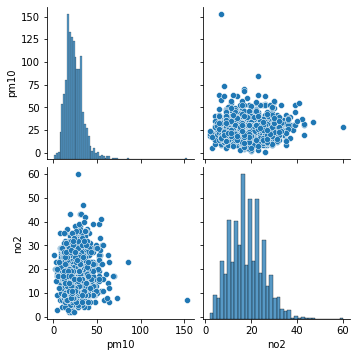

In [7]:
sns.pairplot(dfContBarcPobl_PM10_NO2) 

Y observamos la correlación entre las medidas:

In [8]:
#matriz de correlaciones
dfContBarcPobl_PM10_NO2.corr()

,pm10,no2
pm10,1.000000,0.091599
no2,0.091599,1.000000


De momento vemos que no hay correlación prácticamente entre ambos contaminantes

In [9]:
#matriz de covarianzas
dfContBarcPobl_PM10_NO2.cov()

,pm10,no2
pm10,105.927593,6.822195
no2,6.822195,52.901856


Ahora vamos a quedarnos con los datos de 2018 y 2019 exclusivamente

In [10]:
dfContBarcPobl_PM10_NO2['date'].describe(datetime_is_numeric=True)

count                             2251
mean     2017-11-20 05:46:05.171035136
min                2014-09-25 00:00:00
25%                2016-04-30 12:00:00
50%                2017-11-26 00:00:00
75%                2019-06-13 12:00:00
max                2020-12-28 00:00:00
Name: date, dtype: object

In [11]:
dfContBarcPobl_PM10_NO2['date'].describe()

<ipython-input-11-c27f43e28792>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfContBarcPobl_PM10_NO2['date'].describe()


count                    2251
unique                   2251
top       2019-07-06 00:00:00
freq                        1
first     2014-09-25 00:00:00
last      2020-12-28 00:00:00
Name: date, dtype: object

In [12]:
dfContBarcPobl_PM10_NO2_2018_2019 = dfContBarcPobl_PM10_NO2.loc[(dfContBarcPobl_PM10_NO2['date'] > '2017-12-31') & (dfContBarcPobl_PM10_NO2['date'] < '2020-01-01')]
print(dfContBarcPobl_PM10_NO2_2018_2019)

           date  pm10   no2
361  2019-10-01  30.0  12.0
362  2019-10-02  34.0  17.0
363  2019-10-03  29.0  22.0
364  2019-10-04  36.0  15.0
365  2019-10-05  32.0  11.0
...         ...   ...   ...
1795 2018-04-15   NaN  24.0
1796 2018-05-05   NaN  20.0
1797 2018-05-06   NaN  33.0
1798 2018-01-11   NaN  23.0
1799 2018-01-28   NaN  35.0

[728 rows x 3 columns]


In [13]:
dfContBarcPobl_PM10_NO2_2018_2019.isnull().sum()

date     0
pm10    11
no2      3
dtype: int64

Rellenamos los nulos con los valores medios:

In [14]:
#Primero creamos la copia para rellenar
dfContBarcPobl_PM10_NO2_2018_2019_rellenado = dfContBarcPobl_PM10_NO2_2018_2019.copy()

#Importamos la función SimpleImputer del módulo sklearn.impute
from sklearn.impute import SimpleImputer

#Instanciamos el imputador de estrategia media
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#Ahora rellenamos los valores faltantes de ambos contaminantes con los valores medios.
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['pm10'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2018_2019['pm10'].values.reshape(-1,1))
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['no2'] = imp_mean.fit_transform(dfContBarcPobl_PM10_NO2_2018_2019['no2'].values.reshape(-1,1))

In [15]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.isnull().sum()

date    0
pm10    0
no2     0
dtype: int64

Dejamos ordenado el dataset por fecha descendente:

In [16]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by='date', ascending=False)
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado)

           date       pm10        no2
1789 2019-12-31  23.712692  15.000000
450  2019-12-29  23.000000  17.641379
449  2019-12-28  19.000000  16.000000
448  2019-12-27  16.000000  18.000000
447  2019-12-26  18.000000  15.000000
...         ...        ...        ...
995  2018-01-05  10.000000  20.000000
994  2018-01-04  11.000000  14.000000
993  2018-01-03  10.000000   7.000000
992  2018-01-02  11.000000  10.000000
991  2018-01-01  10.000000  24.000000

[728 rows x 3 columns]


Hacemos el índice igual a la columna Date

In [17]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index = dfContBarcPobl_PM10_NO2_2018_2019_rellenado['date']
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado)

                 date       pm10        no2
date                                       
2019-12-31 2019-12-31  23.712692  15.000000
2019-12-29 2019-12-29  23.000000  17.641379
2019-12-28 2019-12-28  19.000000  16.000000
2019-12-27 2019-12-27  16.000000  18.000000
2019-12-26 2019-12-26  18.000000  15.000000
...               ...        ...        ...
2018-01-05 2018-01-05  10.000000  20.000000
2018-01-04 2018-01-04  11.000000  14.000000
2018-01-03 2018-01-03  10.000000   7.000000
2018-01-02 2018-01-02  11.000000  10.000000
2018-01-01 2018-01-01  10.000000  24.000000

[728 rows x 3 columns]


Pintamos la serie temporal de cada medida:

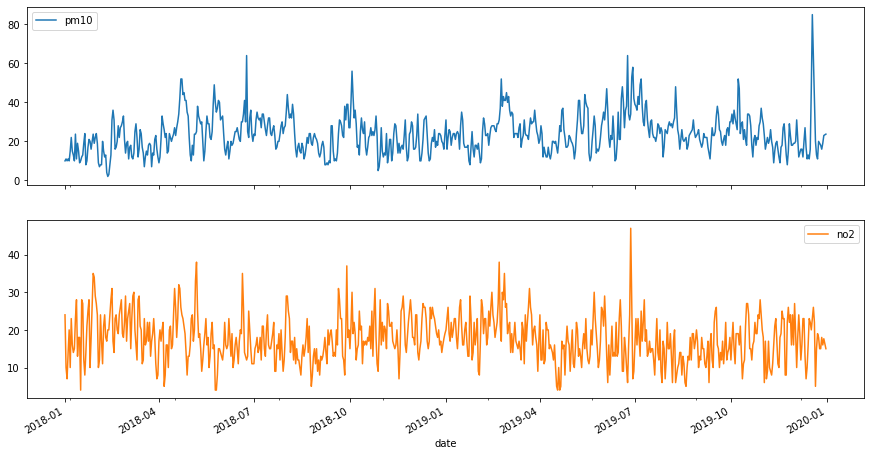

In [29]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.drop(['date'], axis = 1).plot(subplots = True, figsize=(15,8));

Pintamos la gráfica de densidad de cada contaminante

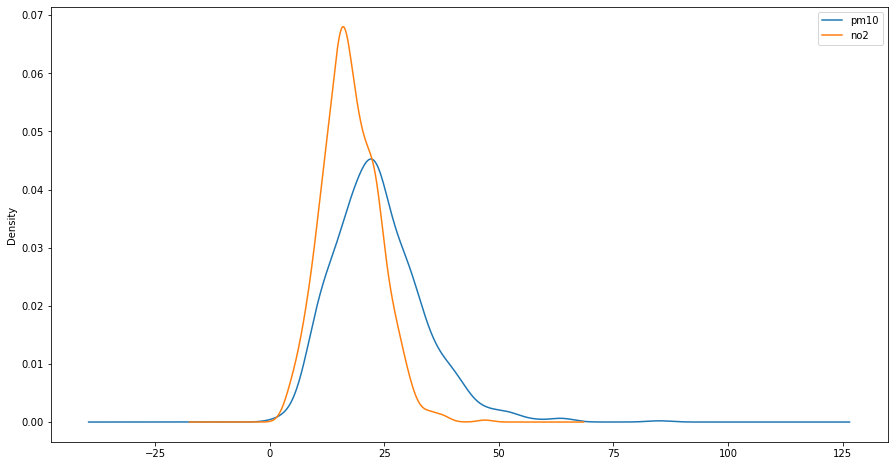

In [30]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.drop(['date'], axis = 1).plot(kind = 'density',figsize=(15,8));

In [31]:
print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado.describe())

             pm10         no2
count  728.000000  728.000000
mean    23.712692   17.641379
std      9.831791    6.124652
min      2.000000    4.000000
25%     17.000000   13.000000
50%     23.000000   17.000000
75%     29.000000   22.000000
max     85.000000   47.000000


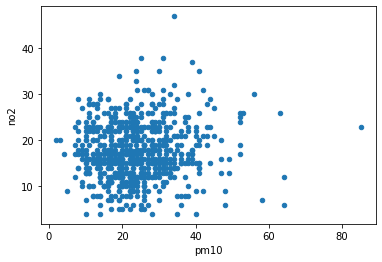

In [32]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado.plot.scatter('pm10','no2');

Seguimos observando que ambos contaminantes no guardan ninguna correlación

Veamos ahora si siguen algún tipo de ciclo anual.

In [33]:
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['year'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado.index.year
dfContBarcPobl_PM10_NO2_2018_2019_rellenado['month-day'] = dfContBarcPobl_PM10_NO2_2018_2019_rellenado['date'].dt.strftime('%m/%d')

print(dfContBarcPobl_PM10_NO2_2018_2019_rellenado)

                 date       pm10        no2  year month-day
date                                                       
2019-12-31 2019-12-31  23.712692  15.000000  2019     12/31
2019-12-29 2019-12-29  23.000000  17.641379  2019     12/29
2019-12-28 2019-12-28  19.000000  16.000000  2019     12/28
2019-12-27 2019-12-27  16.000000  18.000000  2019     12/27
2019-12-26 2019-12-26  18.000000  15.000000  2019     12/26
...               ...        ...        ...   ...       ...
2018-01-05 2018-01-05  10.000000  20.000000  2018     01/05
2018-01-04 2018-01-04  11.000000  14.000000  2018     01/04
2018-01-03 2018-01-03  10.000000   7.000000  2018     01/03
2018-01-02 2018-01-02  11.000000  10.000000  2018     01/02
2018-01-01 2018-01-01  10.000000  24.000000  2018     01/01

[728 rows x 5 columns]


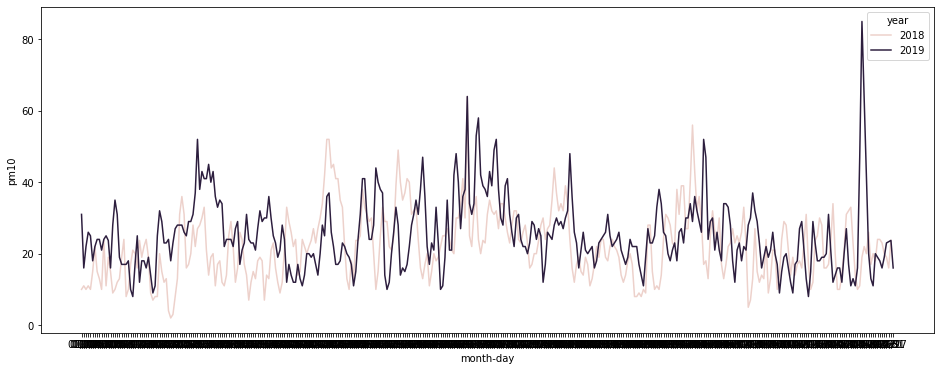

In [34]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='month-day', y='pm10', hue= 'year', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by=['year','month-day']));

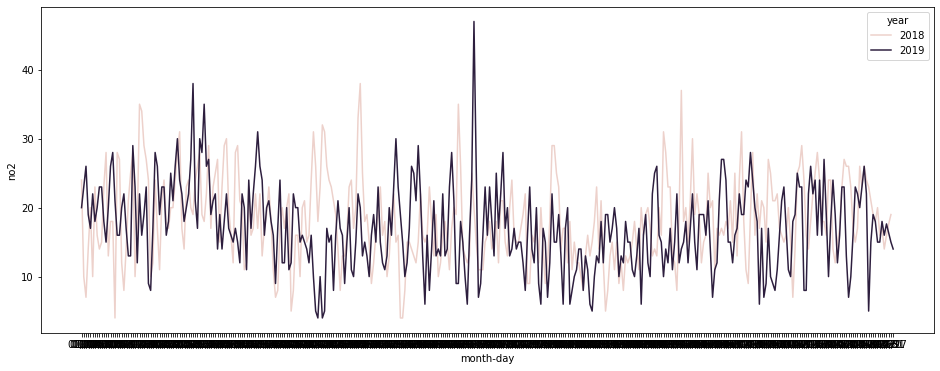

In [35]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='month-day', y='no2', hue= 'year', data=dfContBarcPobl_PM10_NO2_2018_2019_rellenado.sort_values(by=['year','month-day']));